In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [ ]:
img=image.load_img(r"C:\Users\abhin\FSDS\Deep_Learning\dlenv\CNN\happy_or_sad\training\happy\smiling-woman_W6GFOSFAXA.jpg")

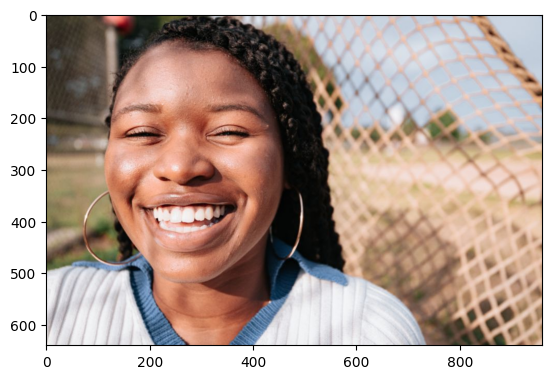

In [3]:
plt.imshow(img)

In [ ]:
i1=cv2.imread(r"C:\Users\abhin\FSDS\Deep_Learning\dlenv\CNN\happy_or_sad\training\happy\smiling-woman_W6GFOSFAXA.jpg")
i1

array([[[ 67,  71,  72],
        [ 66,  70,  71],
        [ 64,  68,  69],
        ...,
        [180, 164, 152],
        [160, 144, 132],
        [142, 126, 114]],

       [[ 66,  70,  71],
        [ 66,  70,  71],
        [ 65,  69,  70],
        ...,
        [188, 172, 160],
        [170, 154, 142],
        [154, 138, 126]],

       [[ 65,  69,  70],
        [ 65,  69,  70],
        [ 63,  68,  69],
        ...,
        [199, 183, 171],
        [184, 168, 156],
        [171, 155, 143]],

       ...,

       [[203, 202, 211],
        [212, 211, 220],
        [230, 230, 236],
        ...,
        [181, 200, 233],
        [181, 200, 233],
        [182, 201, 234]],

       [[206, 205, 214],
        [216, 215, 224],
        [234, 234, 240],
        ...,
        [181, 198, 231],
        [179, 198, 231],
        [179, 198, 233]],

       [[209, 208, 217],
        [219, 218, 227],
        [236, 236, 242],
        ...,
        [178, 196, 227],
        [175, 194, 229],
        [176, 195, 230]]

In [5]:
i1.shape

(640, 960, 3)

In [ ]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset=train.flow_from_directory(r"C:\Users\abhin\FSDS\Deep_Learning\dlenv\CNN\happy_or_sad\training",
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary'
                                        )
validation_dataset=validation.flow_from_directory(r"C:\Users\abhin\FSDS\Deep_Learning\dlenv\CNN\happy_or_sad\validation",
                                                  target_size=(200,200),
                                                  batch_size=3,
                                                  class_mode='binary'
                                                  )

Found 29 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [8]:
train_dataset.class_indices

{'happy': 0, 'sad': 1}

In [9]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [10]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  
                                  tf.keras.layers.Flatten(),
                                  
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  
                                  tf.keras.layers.Dense(1,activation='sigmoid')
                                  ])

c:\Users\abhin\FSDS\Deep_Learning\dlenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [15]:
model_fit=model.fit(train_dataset,epochs=15,)

Epoch 1/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.4876 - loss: 0.9171
Epoch 2/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.7859 - loss: 0.8023
Epoch 3/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.6837 - loss: 0.5598
Epoch 4/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.7781 - loss: 0.4083
Epoch 5/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.9151 - loss: 0.2793
Epoch 6/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.9581 - loss: 0.2576
Epoch 7/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.9765 - loss: 0.1129
Epoch 8/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.9636 - loss: 0.1787
Epoch 9/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.9702 - loss: 0.1228
Epoch 10/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.9351 - loss: 0.1291
Epoch 11/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 1.0000 - loss: 0.0136
Epoch 12/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step -

In [ ]:
dir_path=r"C:\Users\abhin\FSDS\Deep_Learning\dlenv\CNN\happy_or_sad\testing"
for i in os.listdir(dir_path):
    print(i)

360_F_1306872348_BrIS8JJ5RhFZf4YXds20Ey0l3iy4SnrK.jpg
360_F_48883681_3YSVqKeyIvDNGZ9t0A8ynIFaeo64sHDm.jpg
360_F_766701373_qAT5aKOymhy5tqNhirFUCo6MSVw1as2l.jpg
360_F_821849190_K5pRb4Rzyon367vDn15Mj8OM4AROkER6.jpg
6c0b4198-c1d7-4cbd-bf87-826486ec0cbc.jpg
istockphoto-1155205784-612x612.jpg
istockphoto-1313331834-612x612.jpg
istockphoto.jpg
miserable-displeased-man-has-sick-look-red-swollen-eyes-smirks-face-suffers-from-conjunctivitis-seasonal-allergy-poses-against-blue-wall-people-disease-health-problems-concept_273609-42805.avif
sad-little-girl-pigtails-portrait-260nw-1269412360.webp
smile.jpg
young-beautiful-hispanic-sad-woman-260nw-574517179.webp


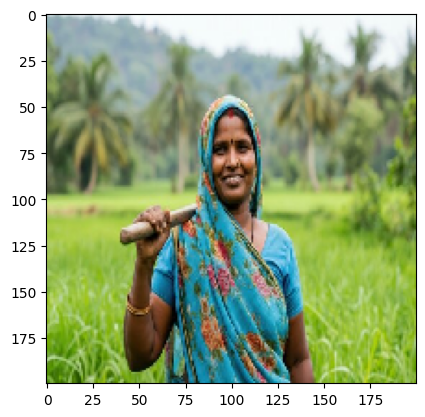

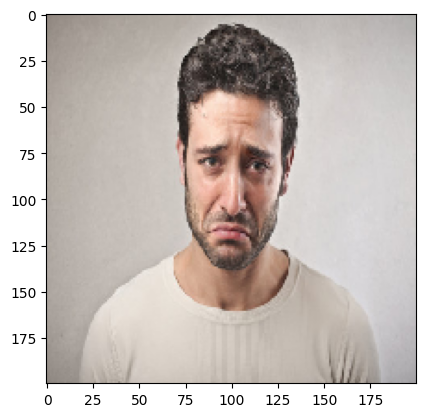

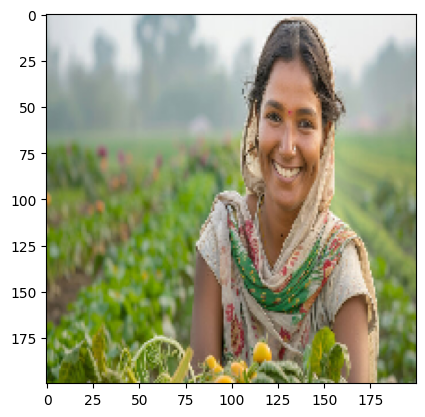

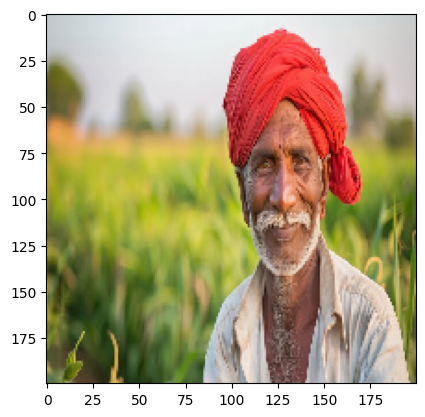

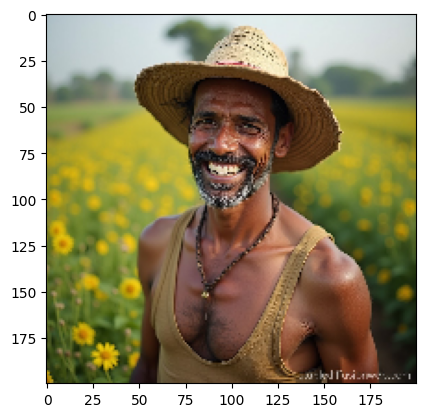

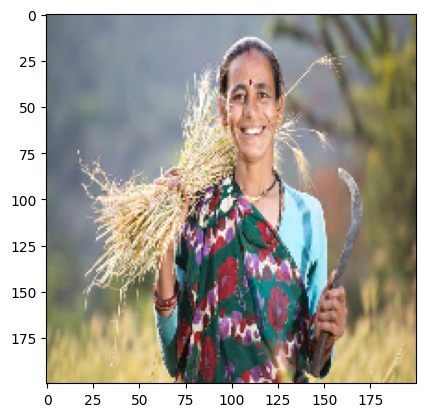

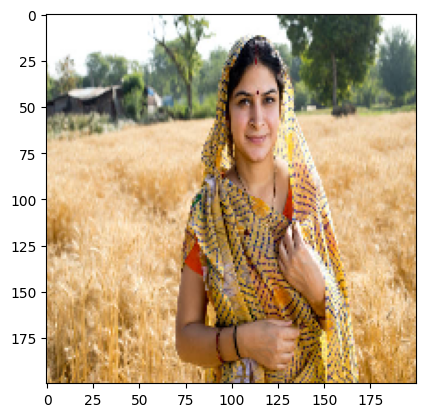

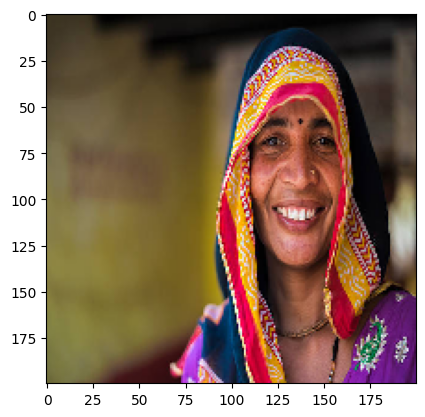

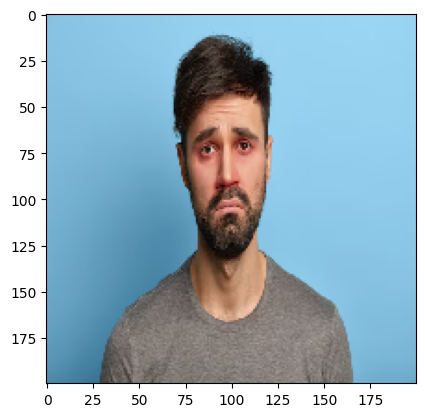

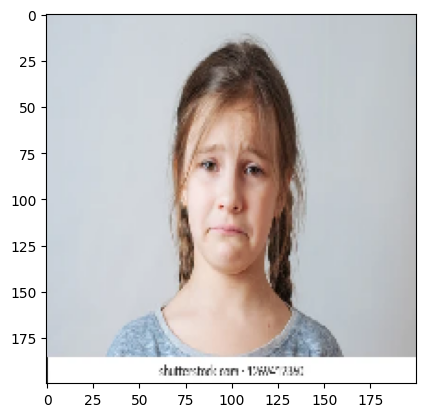

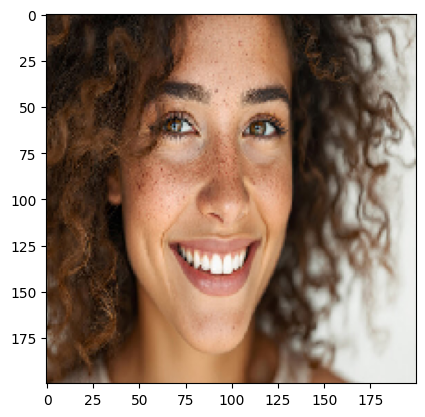

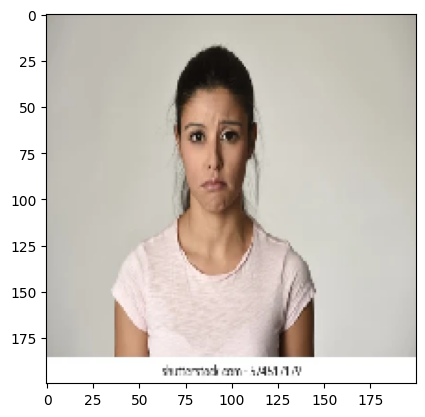

In [ ]:
dir_path=r"C:\Users\abhin\FSDS\Deep_Learning\dlenv\CNN\happy_or_sad\testing"
for i in os.listdir(dir_path):
    img=image.load_img(dir_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()

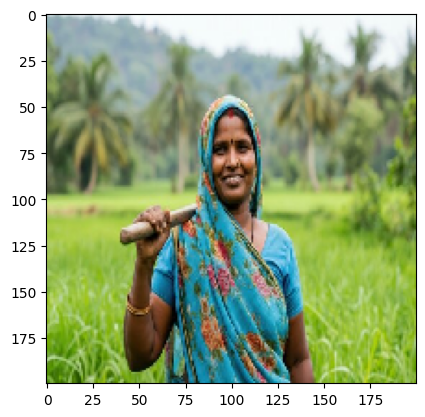

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Happy 😁


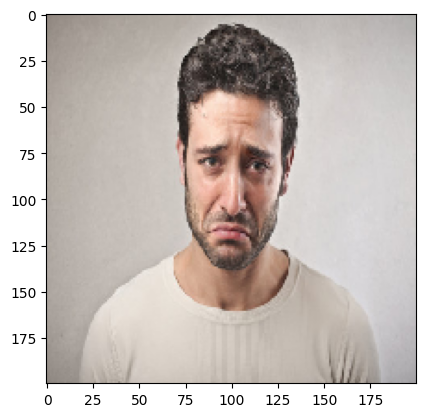

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Sad 😒


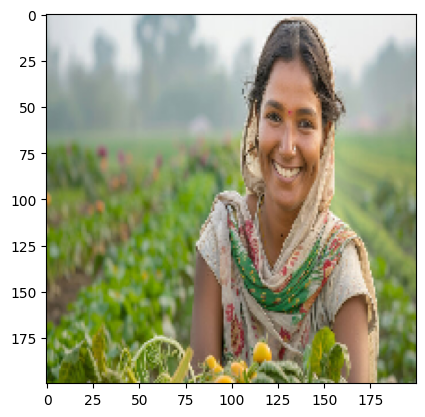

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Happy 😁


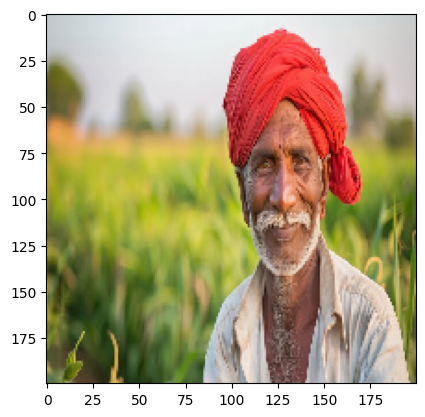

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Happy 😁


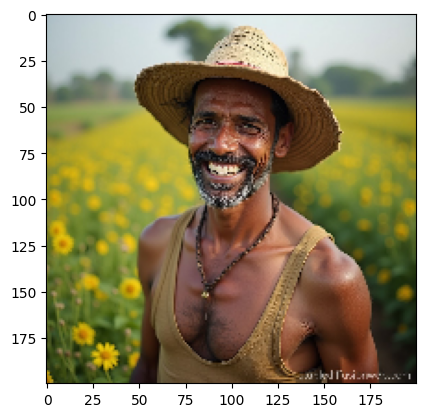

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Happy 😁


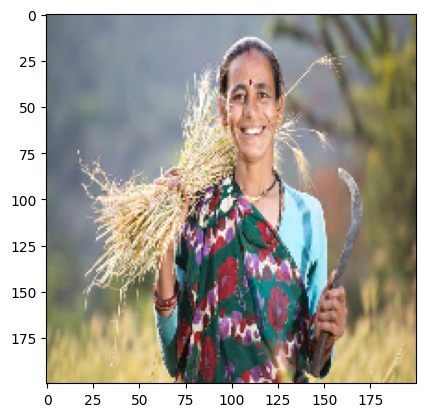

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Happy 😁


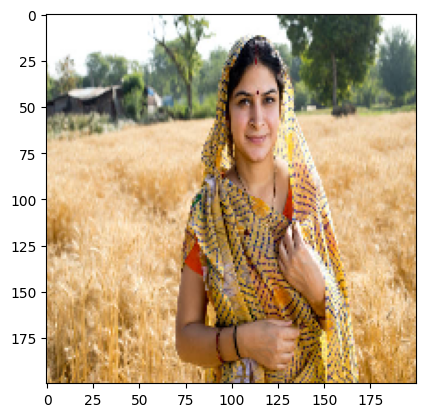

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Happy 😁


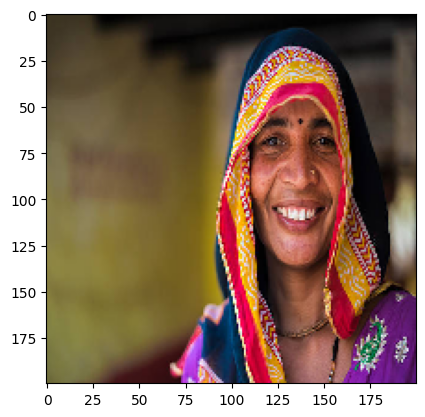

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Happy 😁


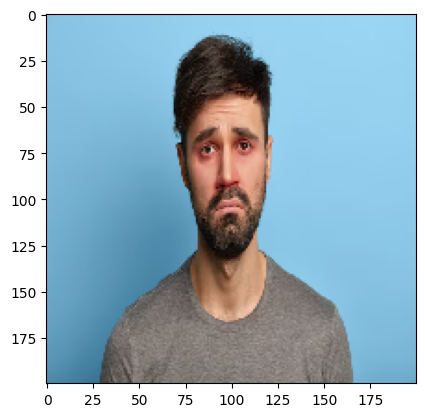

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Sad 😒


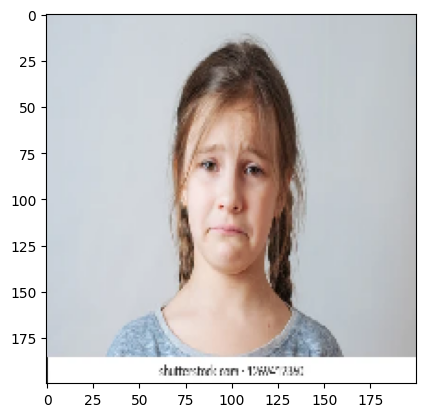

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Sad 😒


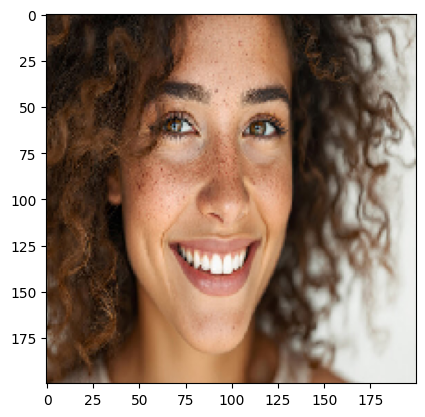

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Happy 😁


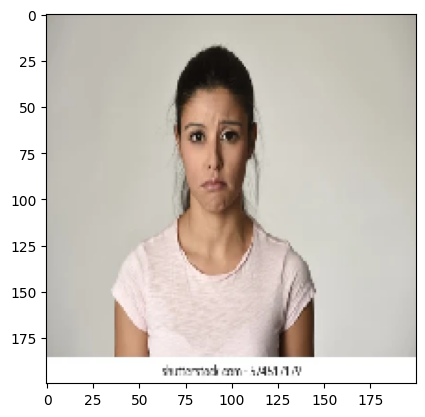

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Sad 😒


In [ ]:
dir_path=r"C:\Users\abhin\FSDS\Deep_Learning\dlenv\CNN\happy_or_sad\testing"

for i in os.listdir(dir_path):
    img=image.load_img(dir_path +'//' + i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    
    val=model.predict(images)
    if val==0:
        print("Happy 😁")
    else:
        print("Sad 😒")